# 	Research Analysis for Graduate Admissions

#### Introduction :
   Analysis of this dataset aims to help students assess their chances to get admission into the Master's program to the right university. By evaluating different independent variables such as GRE, TOEFL, CGPA, etc., students can predict the chances of getting admission. This analysis helps students assess whether to apply to a particular university or not from the previous cut-off of various scores/criteria. It also allows universities to screen the incoming applications of students to give admission to the right candidate without doing all the manual processes.

#### Attributes Description

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import cross_val_score,GridSearchCV

# To build the models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# To evaluate the models
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics

#To impute missing values
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('F:\\HW_Assignment\\HW_03\\Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.drop('Serial No.',axis=1,inplace=True)

In [6]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

##### Renaming the necessary columns

In [43]:
g_adm = data.rename(columns={"GRE Score":"GRE","TOEFL Score":"TOEFL","University Rating":"Univ_Rating","Chance of Admit ":"Admit_chance"})
g_adm.head()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit_chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
pd.DataFrame({"Changed_Names":g_adm.columns,"Data_Type":data.dtypes})

,Changed_Names,Data_Type
GRE Score,GRE,int64
TOEFL Score,TOEFL,int64
University Rating,Univ_Rating,int64
SOP,SOP,float64
LOR,LOR,float64
CGPA,CGPA,float64
Research,Research,int64
Chance of Admit,Admit_chance,float64


In [45]:
g_adm.dtypes

GRE               int64
TOEFL             int64
Univ_Rating       int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_chance    float64
dtype: object

#### Data Exploration and Inspection
##### Basic Statistics of the data

In [46]:
g_adm.describe()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit_chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


##### Checking for missing values

In [47]:
print(g_adm.isnull().sum())
print("\n Total missing values in data :",g_adm.isnull().values.sum())

GRE             0
TOEFL           0
Univ_Rating     0
SOP             0
LOR             0
CGPA            0
Research        0
Admit_chance    0
dtype: int64

 Total missing values in data : 0


### 1. Exploratory Data Analysis

#### Univariate Analysis

##### Boxplots to know the variability and spread of the data

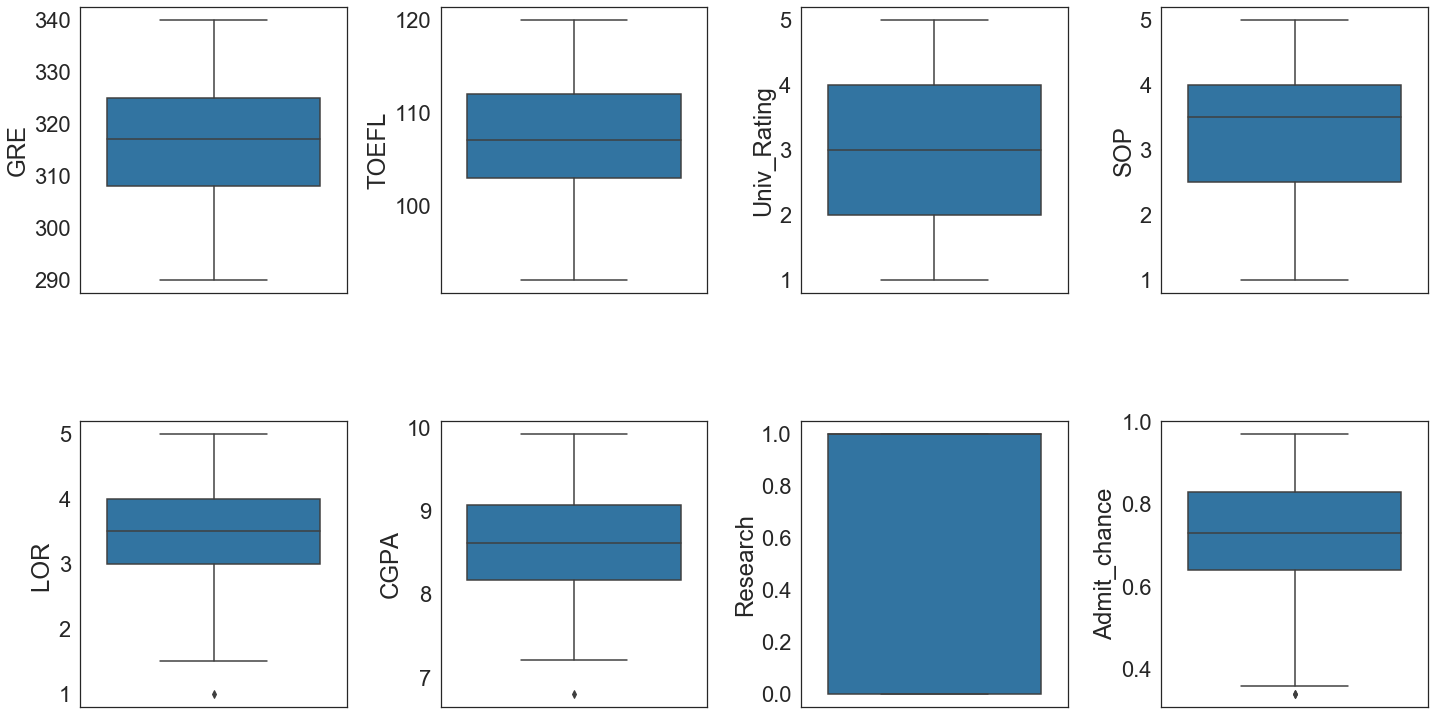

In [48]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
sns.set_context("notebook",font_scale=2)
count = 0
ax = ax.flatten()
for i in g_adm.columns:
    sns.boxplot(y = i, data = g_adm, ax = ax[count])
    count += 1
plt.tight_layout(pad = 0.4,w_pad = 0.6 , h_pad = 5.0)

##### Checking for % of outliers in each column

In [13]:
A = []
for i in g_adm.columns:
    Q1 = g_adm[i].describe(percentiles=[0.25,0.75])[['25%','75%']][0]
    Q3 = g_adm[i].describe(percentiles=[0.25,0.75])[['25%','75%']][1]
    IQR = Q3 - Q1
    L = Q1 + 1.5*IQR
    H = Q3 + 1.5*IQR
    p = g_adm[i]
    count = g_adm[(g_adm[i]<L) | (g_adm[i]>H)]
    perc = (len(g_adm)-len(count[i]))*100/g_adm.shape[0]
    A.append(perc)
pd.DataFrame({"columns" :g_adm.columns,"%_outliers" : A})

,columns,%_outliers
0,GRE,8.00
1,TOEFL,8.25
2,Univ_Rating,15.00
3,SOP,9.25
4,LOR,20.00
5,CGPA,6.25
6,Research,0.00
7,Admit_chance,9.00


##### Distribution Plots

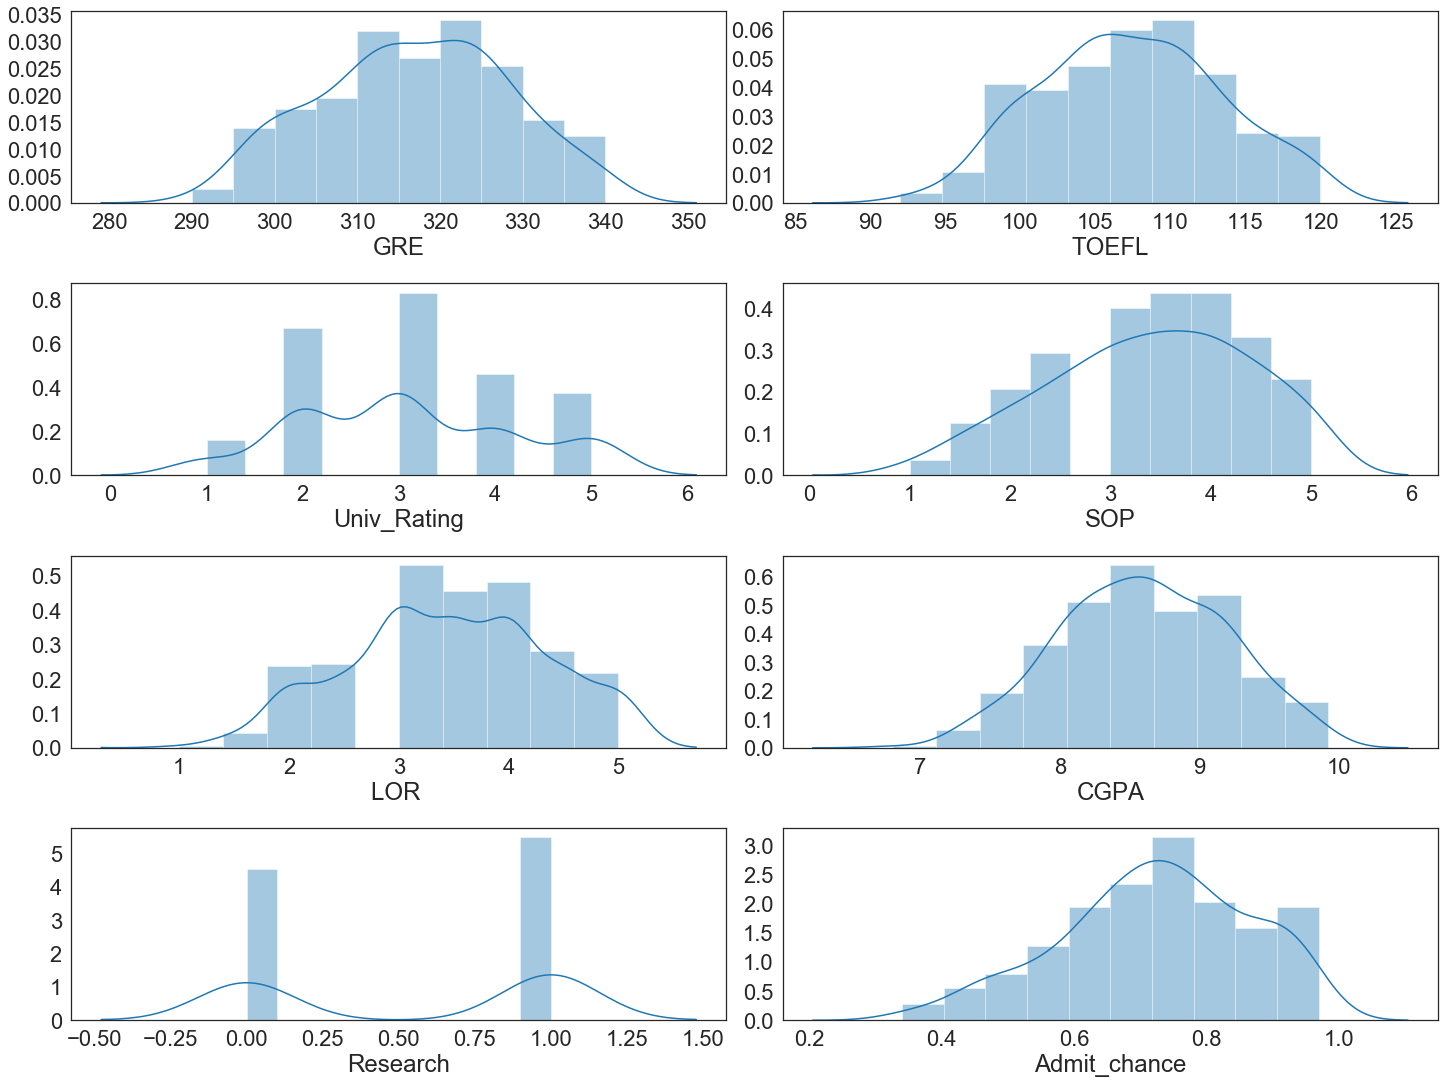

In [49]:
fig, ax = plt.subplots(4,2,figsize=(20,15))
sns.set_style("white")
sns.set_context("notebook",font_scale=1)
count = 0
axs = ax.flatten()
for k,i in g_adm.items():
    sns.distplot(i , ax = axs[count],kde=True,bins=10)
    count += 1
plt.tight_layout(pad = 0.4,w_pad = 0.4 , h_pad = 2.0)

##### Observations :
        1. Almost all the data normally distributed

##### correlation plot 

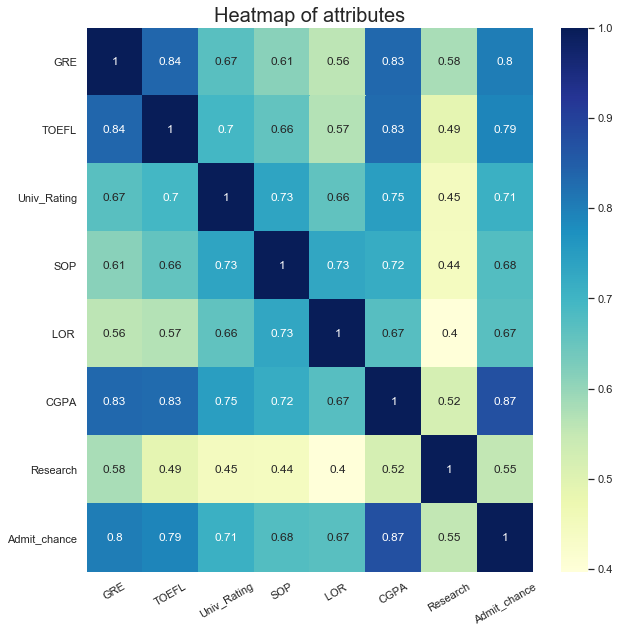

In [15]:
plt.figure(figsize = (10,10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1)
ax = sns.heatmap(g_adm.corr(), annot = True, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');
plt.title("Heatmap of attributes",fontdict={'fontsize':20})
plt.show()

### From the above correlation plot
    1. We can say that only 55% students with research experience got a chanace to get an admission into the universities.
    2.Independent variables like GRE,TOFEL scores,CGPA,University rating,SOP,LOR are strongly correlated to Admission chance

#### Bivariate Analysis :

##### Pairplot allows to give pairwise relatioinship between the variables visually 

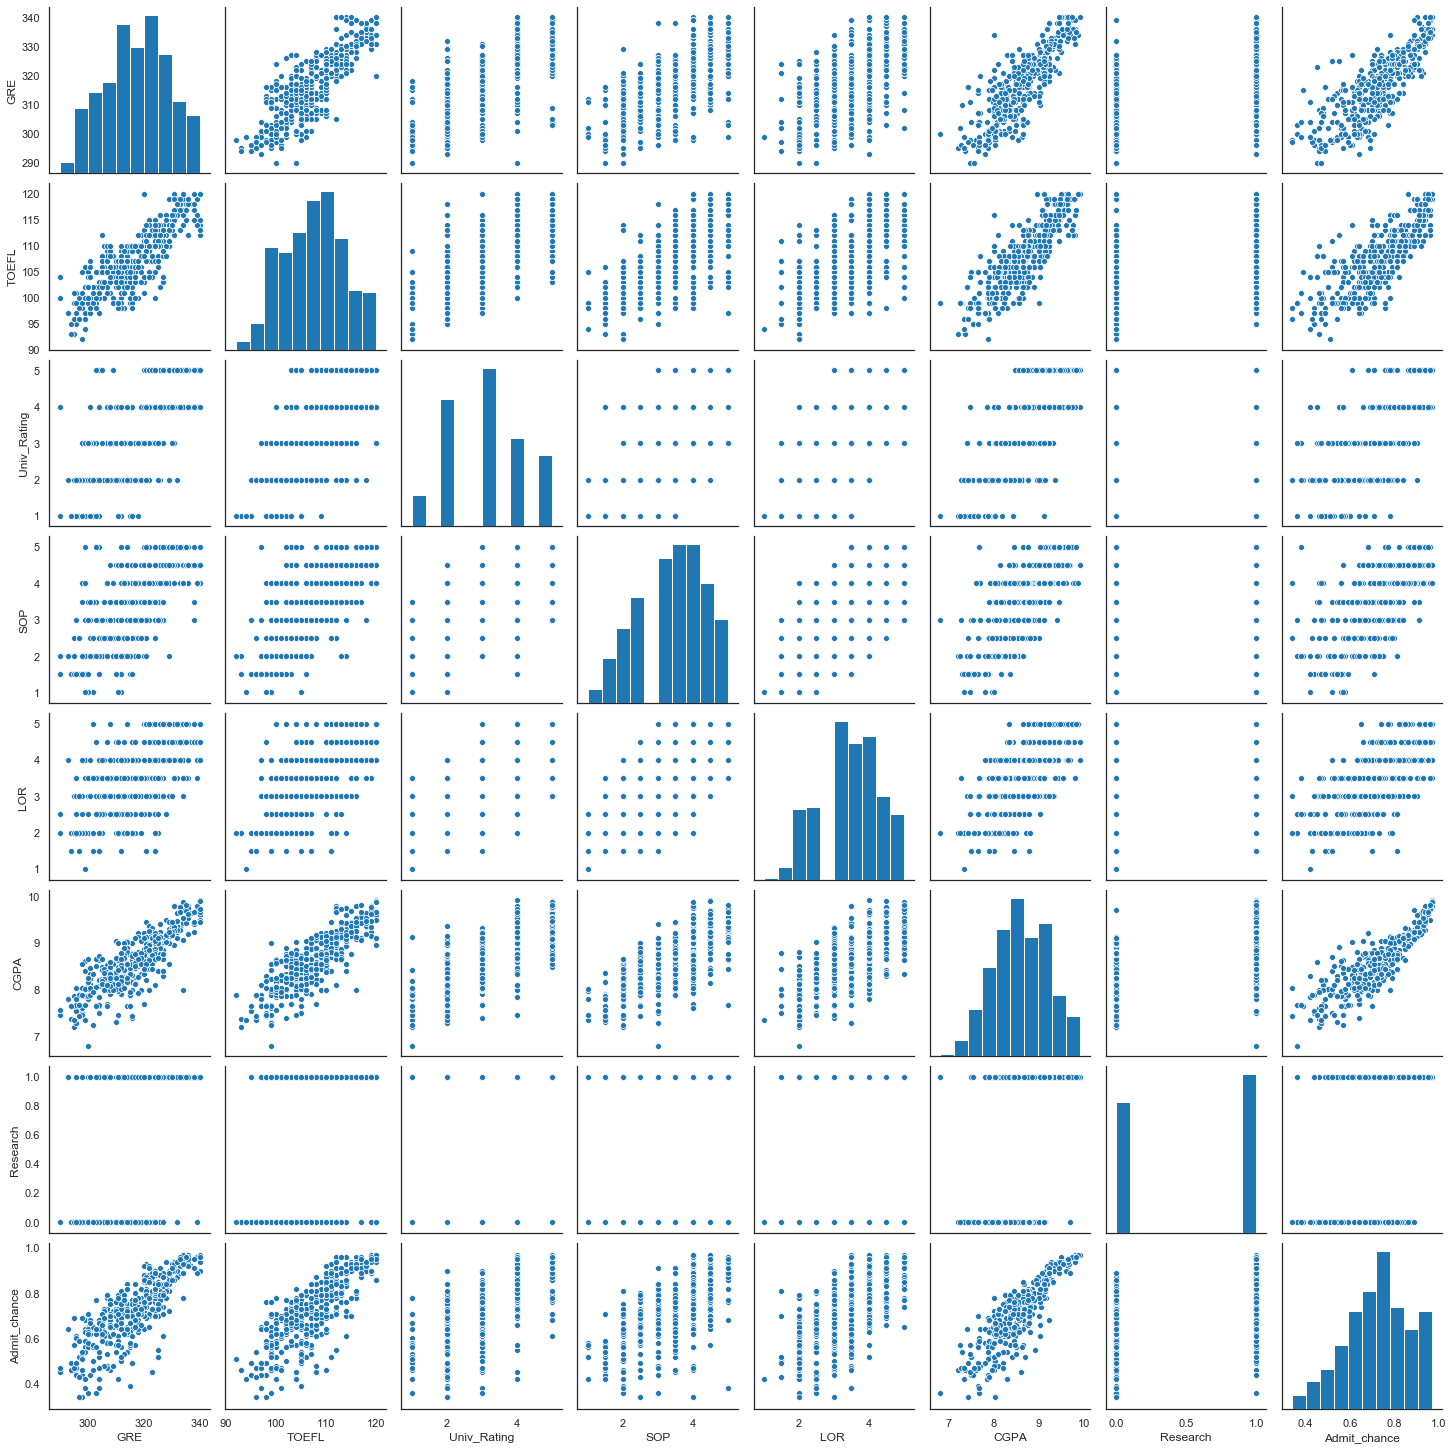

In [16]:
sns.pairplot(g_adm)
plt.show()

#### Regression plot :

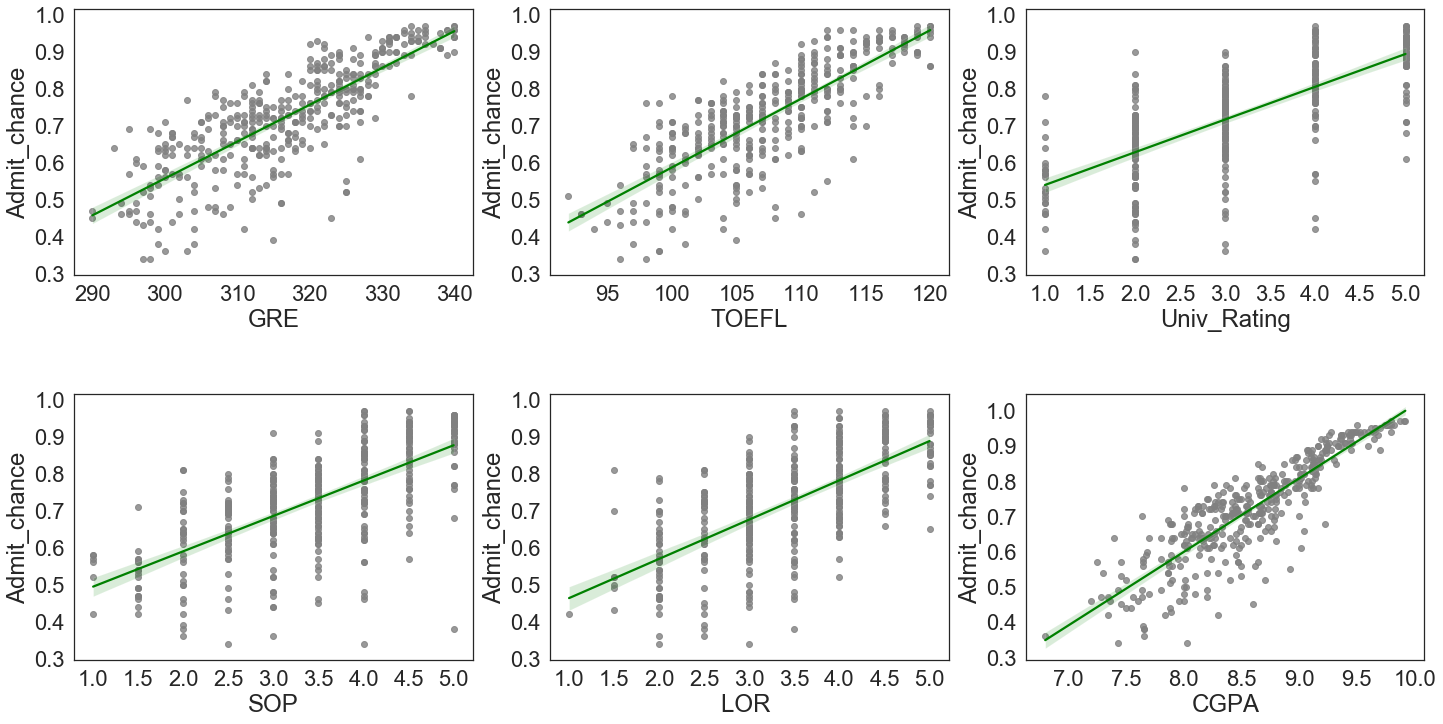

In [58]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1)
k = 0
axs = ax.flatten()
for k,i in enumerate(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA']):
    sns.regplot(y=g_adm.Admit_chance,x=g_adm[i] , ax = axs[k],scatter_kws={"color": "grey"}, line_kws={"color": "green"},color='b')
plt.tight_layout(pad = 0.4,w_pad = 0.6 , h_pad = 5.0)

##### Lets create  a new categorical column "admission"  for better understanding of  data by assuming Admit_chance >0.75 as 1 (got admission) and Admit_chance <0.75 as 0 (No Admission)

In [18]:
admission = g_adm
admission['Admin'] = g_adm['Admit_chance'].apply(lambda x : "1" if (x>=0.75) else "0")

In [19]:
admission.head()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit_chance,Admin
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


#### 

<Figure size 1440x432 with 0 Axes>

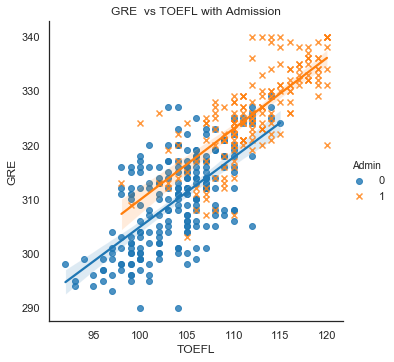

In [63]:
plt.figure(figsize = (20,6))
sns.set_style("white")
sns.set_context("notebook",font_scale=1)

ax1 = sns.lmplot(x = "TOEFL",y = "GRE",data = admission,hue = 'Admin',markers=["o", "x"]);
plt.title("GRE  vs TOEFL with Admission");

<Figure size 1440x432 with 0 Axes>

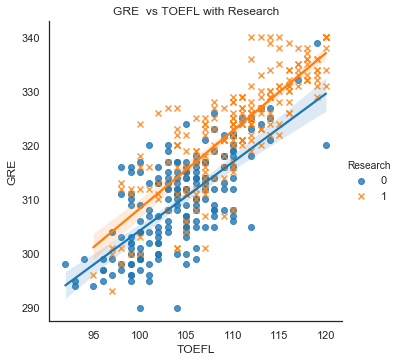

In [62]:
plt.figure(figsize = (20,6))
sns.set_style("white")
sns.set_context("notebook",font_scale=1)

ax1 = sns.lmplot(x = "TOEFL",y = "GRE",data = admission,hue = 'Research',markers=["o", "x"]);
plt.title("GRE  vs TOEFL with Research");

<Figure size 720x1440 with 0 Axes>

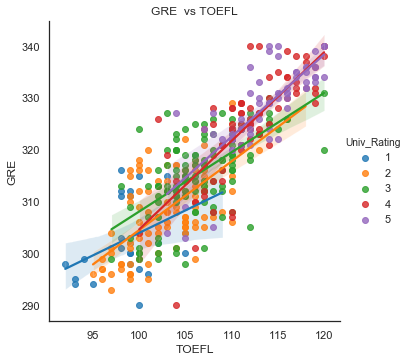

In [22]:
plt.figure(figsize = (10,20))

ax1 = sns.lmplot(x = "TOEFL",y = "GRE",data = admission,hue = 'Univ_Rating')
plt.title("GRE  vs TOEFL");

In [64]:
p = admission.groupby(['Univ_Rating']).mean()
p

,GRE,TOEFL,SOP,LOR,CGPA,Research,Admit_chance
Univ_Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


<Figure size 720x1440 with 0 Axes>

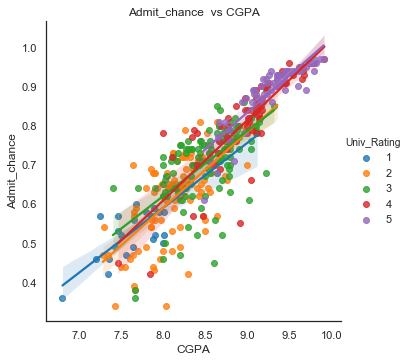

In [24]:
plt.figure(figsize = (10,20))

ax1 = sns.lmplot(x = "CGPA",y = "Admit_chance",data = admission,hue = 'Univ_Rating')
plt.title("Admit_chance  vs CGPA");

Text(0.5, 1.0, 'University Rating vs No. of Students admitted')

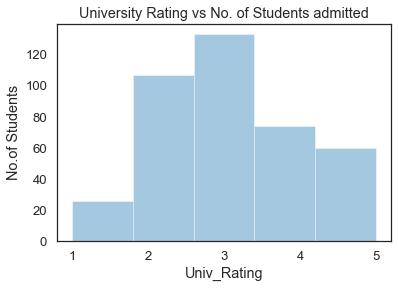

In [25]:
sns.set_context("notebook",font_scale=1.2)
ax = sns.distplot(admission.Univ_Rating,bins=5,kde = False,)
ax.set(ylabel = "No.of Students")
ax.set_title("University Rating vs No. of Students admitted")

###### From the above 2 plots GRE  vs TOEFL with respective to research and admin :
        It shows that people with good TOFEL and GRE scores having research are getting admitted

In [26]:
admission.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Admit_chance', 'Admin'],
      dtype='object')

<Figure size 720x1440 with 0 Axes>

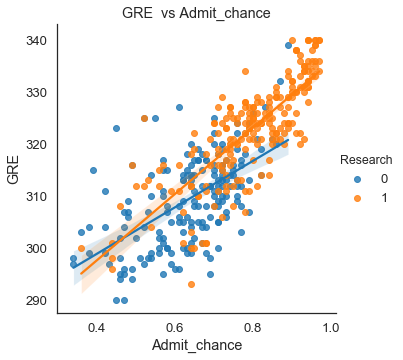

In [27]:
plt.figure(figsize = (10,20))

ax1 = sns.lmplot(x = "Admit_chance",y = "GRE",data = admission,hue = 'Research')
plt.title("GRE  vs Admit_chance");

In [68]:
admission[admission['Research']==0].groupby(['Admin','Univ_Rating']).mean()

GRE       TOEFL       SOP      LOR       CGPA  \
Admin Univ_Rating                                                         
0     1            301.400000   98.700000  1.675000  2.075000  7.641000   
      2            307.260274  102.808219  2.623288  2.876712  8.107808   
      3            311.312500  104.979167  3.250000  3.281250  8.372083   
      4            309.000000  107.428571  2.500000  2.714286  8.292857   
      5            306.000000  105.333333  3.833333  3.500000  8.560000   
1     1            318.000000  109.000000  3.500000  3.500000  9.120000   
      2            319.000000  105.500000  2.500000  2.250000  8.600000   
      3            315.642857  107.642857  3.571429  3.642857  8.750714   
      4            319.000000  110.250000  4.437500  4.500000  8.817500   
      5            321.800000  111.000000  4.500000  4.100000  8.980000   

                   Research  Admit_chance  
Admin Univ_Rating                          
0     1                 0.0      0.528500  
      2                 0.0      0.604932  
      3                 0.0      0.646667  
      4                 0.0      0.565714  
      5                 0.0      0.666667  
1     1                 0.0      0.780000  
      2                 0.0      0.790000  
      3                 0.0      0.777857  
      4                 0.0      0.806250  
      5                 0.0      0.798000

In [29]:
admission[admission['Admin']=='1'].groupby(['Univ_Rating']).mean()

,GRE,TOEFL,SOP,LOR,CGPA,Research,Admit_chance
Univ_Rating,,,,,,,
1,318.000000,109.000000,3.500000,3.500000,9.120000,0.000000,0.780000
2,321.300000,110.300000,3.250000,2.900000,8.793000,0.800000,0.805000
3,319.961538,108.903846,3.490385,3.576923,8.798846,0.730769,0.794038
4,327.311475,112.622951,4.286885,4.180328,9.141803,0.868852,0.857541
5,329.553571,114.285714,4.562500,4.419643,9.338393,0.910714,0.903214


In [30]:
g_adm.describe()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Admit_chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Model Building
    Splitting the data into train and test

In [31]:
x = g_adm.drop(['Admit_chance','Admin'],axis=1)
y = g_adm.Admit_chance

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

### Linear Regression model

In [33]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print("Intercept :",lm.intercept_)
pd.DataFrame({"labels":x.columns,"Coefficients" : lm.coef_})

Intercept : -1.314407091024913


,labels,Coefficients
0,GRE,0.001868
1,TOEFL,0.002273
2,Univ_Rating,0.002706
3,SOP,-0.003075
4,LOR,0.020717
5,CGPA,0.130255
6,Research,0.022696


##### Admit_chance = 0.001868*GRE + 0.002273*TOEFL + 0.002706*Univ_Rating - 0.003075*SOP + 0.020717*LOR + 0.130255*CGPA + 0.022696*Research -1.314407091024913

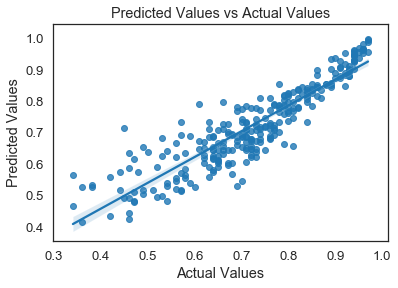

In [80]:
sns.set_context("notebook",font_scale=1.2)
ax = sns.regplot(x=y_train,y = lm.predict(X_train) );
ax.set_title("Predicted Values vs Actual Values");
plt.xlabel("Actual Values");
plt.ylabel("Predicted Values");

In [69]:
scores = cross_val_score(lm,X_train,y_train,cv = 8)
print("R2 score :",scores*100)
print("Mean Squared Error '(MSE)' :",scores.mean()*100,'(+/-)',scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=lm.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=lm.predict(X_test))*100)

R2 score : [70.35816507 81.63264971 80.21409865 87.45324393 73.33461672 84.27137453
 87.5977744  75.45577769]
Mean Squared Error '(MSE)' : 80.0397125872665 (+/-) 6.044240019204296

 R2 score for train : 82.21063439698572
 R2 score for test : 74.56624883029339


###  Support Vector Machine Regression

In [36]:
svm = SVR(kernel='rbf',gamma=0.1)
svm.fit(X_train,y_train)
svm_scores = cross_val_score(svm,X_train,y_train,cv = 8)
print("R2 score SVM:",svm_scores*100)
print("Mean Squared Error '(MSE)' :",svm_scores.mean()*100,svm_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=svm.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=svm.predict(X_test))*100)

R2 score SVM: [51.31401158 37.80907652 66.56284064 69.18509515 47.99371285 63.47970651
 69.00807702 56.20821339]
Mean Squared Error '(MSE)' : 57.695091707185206 10.633684086192378

 R2 score for train : 75.59419738544074
 R2 score for test : 53.17810975596318


### 	KNN Regression

In [37]:
KNN = KNeighborsRegressor(n_neighbors=11)
KNN.fit(X_train,y_train)
KNN_scores = cross_val_score(KNN,X_train,y_train,cv = 8)
print("R2 score KNN:",KNN_scores*100)
print("Mean Squared Error '(MSE)' :",KNN_scores.mean()*100,KNN_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=KNN.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=KNN.predict(X_test))*100)

R2 score KNN: [68.12641479 59.48114253 78.71189406 83.11629204 56.09649746 76.26663001
 85.00511896 64.20702432]
Mean Squared Error '(MSE)' : 71.37637677072858 10.236123482598687

 R2 score for train : 78.28084221266143
 R2 score for test : 64.80679596106948


###    Decision Tree Regression

In [38]:
Tree = DecisionTreeRegressor(max_depth=4)
Tree.fit(X_train,y_train)
Tree_scores = cross_val_score(Tree,X_train,y_train,cv = 8)
print("R2 score DecisionTree:",Tree_scores*100)
print("Mean Squared Error '(MSE)' :",Tree_scores.mean()*100,Tree_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=Tree.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=Tree.predict(X_test))*100)

R2 score DecisionTree: [54.6089917  50.4373318  79.67508761 87.21351384 71.41847626 80.43845508
 86.08821734 63.8787429 ]
Mean Squared Error '(MSE)' : 71.71985206627474 13.196137306861003

 R2 score for train : 85.05616960962318
 R2 score for test : 61.063875731370246


### 	Random Forest Regression

In [39]:
random_reg = RandomForestRegressor(n_estimators=10,random_state=0,criterion='mse')
random_reg.fit(X_train,y_train)
random_reg_scores = cross_val_score(random_reg,X_train,y_train,cv = 8)
print("R2 score RandomForest:",random_reg_scores*100)
print("Mean Squared Error '(MSE)' :",random_reg_scores.mean()*100,random_reg_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=random_reg.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=random_reg.predict(X_test))*100)

R2 score RandomForest: [57.42794913 65.41296879 75.05126624 88.33145662 67.96520484 76.03721434
 80.40512033 65.97689996]
Mean Squared Error '(MSE)' : 72.07601003143407 9.159807454564687

 R2 score for train : 96.12501819768906
 R2 score for test : 66.9766963283795


### Feature Importance

In [40]:
Feature_importance = pd.DataFrame({"Features":X_train.columns,"Importance":random_reg.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

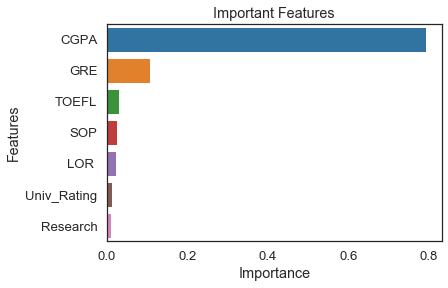

In [41]:
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");

#### Conclusion :